# Using inputs to vary simulation parameters

In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = pybamm.lithium_ion.SPM()
param = model.default_parameter_values
geometry = model.default_geometry

In [3]:
input_label = "Lower voltage cut-off [V]"

In [4]:
param[input_label]

3.105

In [5]:
param[input_label] = "[input]"

In [6]:
param.process_model(model)
param.process_geometry(geometry)

In [7]:
solver = pybamm.CasadiSolver(mode='safe')
sim = pybamm.Simulation(
    model=model,
    geometry=geometry,
    parameter_values=param,
    solver=solver
)

In [8]:
t_eval = np.linspace(0, 2*3600, 200)

In [12]:
sim.solve(t_eval=t_eval, inputs={input_label: 3.6})
sol1 = sim.solution
sim.solve(t_eval=t_eval, inputs={input_label: 3.3})
sol2 = sim.solution

In [13]:
plot = pybamm.QuickPlot([sol1, sol2], output_variables=["Terminal voltage [V]"], labels=["3.6", "3.3"])

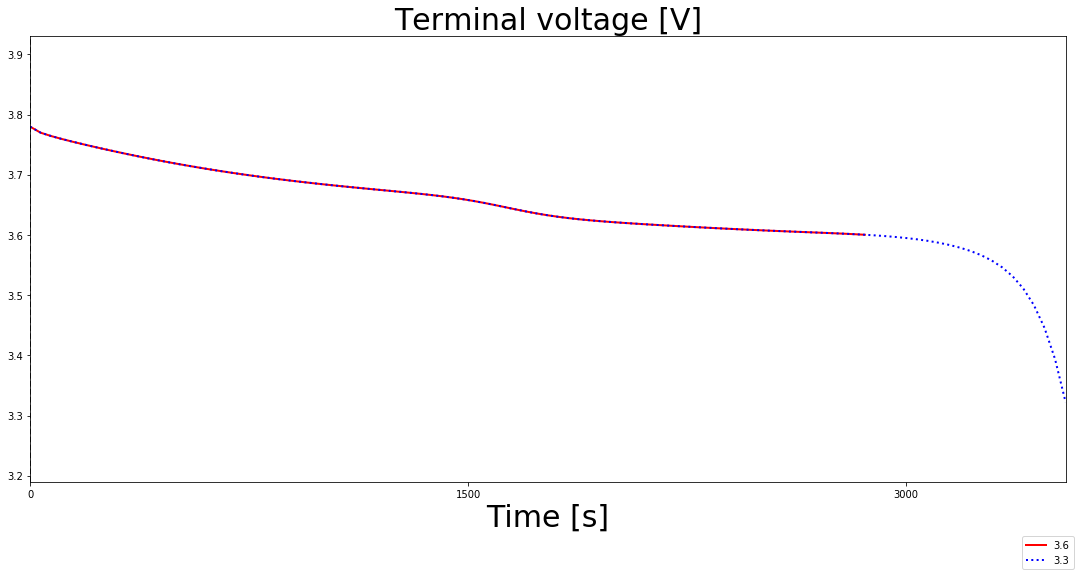

In [14]:
plot.plot(0)